# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [4]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_0_cuad(xs: list, ys: list) -> tuple[float, float, float, float]:
    c2 = sum(xi**2 for xi in xs)
    c1 = sum(xi for xi in xs)
    c0 = len(xs)
    c_ind = sum(yi for yi in ys)
    return (c2, c1, c0, c_ind)

def der_parcial_1_cuad(xs: list, ys: list) -> tuple[float, float, float, float]:
    c2 = sum(xi**3 for xi in xs)
    c1 = sum(xi**2 for xi in xs)
    c0 = sum(xi for xi in xs)
    c_ind = sum(xi*yi for xi, yi in zip(xs, ys))
    return (c2, c1, c0, c_ind)

def der_parcial_2_cuad(xs: list, ys: list) -> tuple[float, float, float, float]:
    c2 = sum(xi**4 for xi in xs)
    c1 = sum(xi**3 for xi in xs)
    c0 = sum(xi**2 for xi in xs)
    c_ind = sum(xi**2 * yi for xi, yi in zip(xs, ys))
    return (c2, c1, c0, c_ind)

# Conjunto de datos de ejemplo

In [5]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [6]:
from src import ajustar_min_cuadrados  # no modificar esta función

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[07-18 09:43:08][INFO] 2025-07-18 09:43:08.892847
[07-18 09:43:08][INFO] 2025-07-18 09:43:08.900834
[07-18 09:43:08][INFO] Se ajustarán 2 parámetros.
[07-18 09:43:08][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


## Conjunto de datos 1

In [7]:
import numpy as np
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

coef = np.polyfit(xs1, ys1, deg=2)
a_2, a_1, a_0 = coef
print("a_2 =", a_2)
print("a_1 =", a_1)
print("a_0 =", a_0)

print("y(2.25) =", a_2 * (2.25**2) + a_1 * 2.25 + a_0)
print("y(-2.25) =", a_2* (-2.25)**2 + a_1* (-2.25) + a_0)

a_2 = 2.0244104829250835
a_1 = -1.1233251295755438
a_0 = -0.6382556172537797
y(2.25) = 7.082840911009482
y(-2.25) = 12.13780399409943


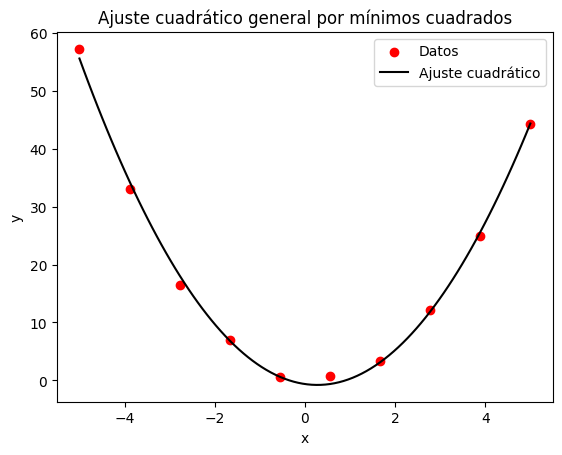

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Ajuste polinómico de grado 2 (cuadrático)
coef = np.polyfit(xs1, ys1, deg=2)
p = np.poly1d(coef)

x = np.linspace(min(xs1), max(xs1), 100)
y = p(x)

plt.scatter(xs1, ys1, label="Datos", color="red")
plt.plot(x, y, color="black", label="Ajuste cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático general por mínimos cuadrados")
plt.legend()
plt.show()

## Conjunto de datos 2

In [9]:
import numpy as np
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

# Transformación logarítmica para ajuste lineal
log_ys2 = np.log(ys2)
coef = np.polyfit(xs2, log_ys2, 1)
b, log_a = coef
a = np.exp(log_a)

print("a =", a)
print("b =", b)
print("y(5) =", a * np.exp(b * 5))
print("y(1) =", a * np.exp(b * 1))

a = 0.5440855388147079
b = 1.417160366705542
y(5) = 650.1174439111655
y(1) = 2.2445646053759503


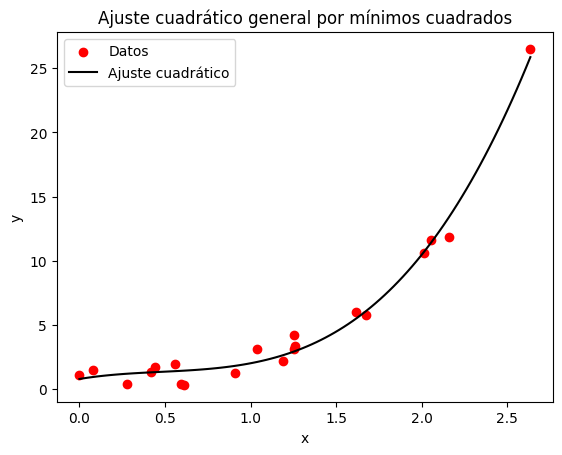

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Ajuste polinómico de grado 3 (cubico)
coef = np.polyfit(xs2, ys2, deg=3)
p = np.poly1d(coef)

x = np.linspace(min(xs2), max(xs2), 100)
y = p(x)

plt.scatter(xs2, ys2, label="Datos",color="red")
plt.plot(x, y, color="black", label="Ajuste cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático general por mínimos cuadrados")
plt.legend()
plt.show()